|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q2: Read instagram_users.csv file

In [2]:
df = pd.read_csv('instagram_users.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64244 entries, 0 to 64243
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    Num_posts               64244 non-null  int64  
 1   Num_following            64244 non-null  int64  
 2   Num_followers            64244 non-null  int64  
 3   Biography_length         64244 non-null  int64  
 4   Picture_availability     64244 non-null  int64  
 5   Link_availability        64244 non-null  int64  
 6   Average_caption_length   64244 non-null  int64  
 7   Caption_zero             64244 non-null  float64
 8   Non_image_percentage     64244 non-null  float64
 9   Engagement_rate_like     64244 non-null  float64
 10  Engagement_rate_comment  64244 non-null  float64
 11  Location_tag_percentage  64244 non-null  float64
 12  Average_hashtag_count    64244 non-null  float64
 13  Promotional_keywords     64244 non-null  float64
 14  Followers_keywords    

# Q3: Split tha dataset into training and testing

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = df.drop('real_fake',axis=1)
y = df['real_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree1 = DecisionTreeClassifier()

In [8]:
dtree1.fit(X_train,y_train)

DecisionTreeClassifier()

In [9]:
predictions1 = dtree1.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [11]:
print(accuracy_score(y_test,predictions1))

0.8515098059562104


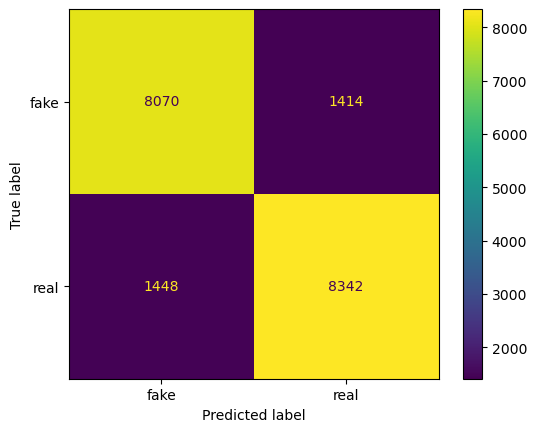

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtree1, X_test, y_test)  
plt.show()

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
randfor = RandomForestClassifier(n_estimators=100)

In [15]:
randfor.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
predictionsRand = randfor.predict(X_test)

In [17]:
print(accuracy_score(y_test,predictionsRand))

0.8959219674172461


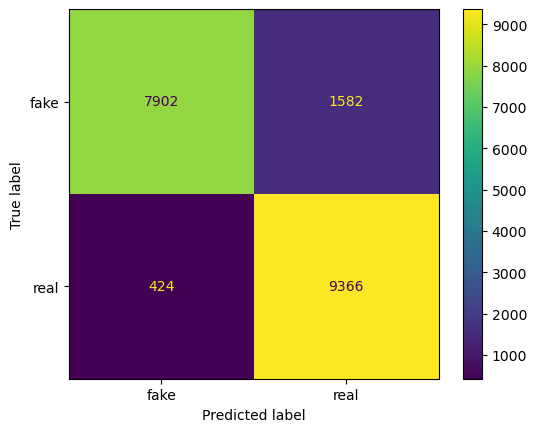

In [18]:
plot_confusion_matrix(randfor, X_test, y_test)  
plt.show()

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [19]:
randf = RandomForestClassifier()

In [20]:
randf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
predictions = randf.predict(X_test)

In [22]:
print(accuracy_score(y_test,predictions))

0.8985680190930787


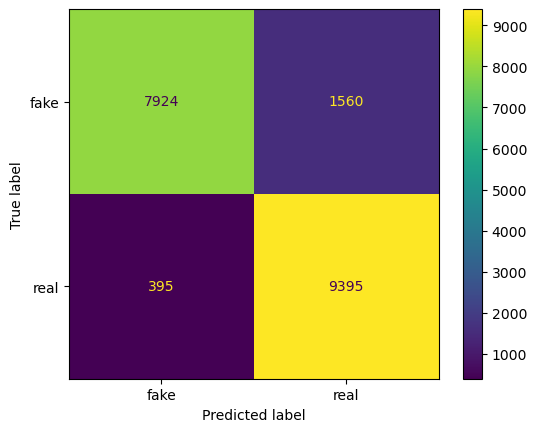

In [24]:
plot_confusion_matrix(randf, X_test, y_test)  
plt.show()